## Github Classroom

Repository : https://github.com/cs418-fa24/project-check-in-team-7

## Project description

This project focuses on predicting the likelihood of diabetic patients being readmitted to the hospital within 30 days. By leveraging a dataset containing information about patient encounters, including demographic details, medical history, diagnosis codes, and treatment data, the goal is to develop a model that can identify high-risk patients. 
By predicting which patients are most likely to be readmitted, hospitals can allocate resources more effectively, prioritize interventions for high-risk individuals, and improve patient care.

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [115]:
df = pd.read_csv("diabetic_data_initial.csv")

In [116]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Data Exploration

In [117]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (101766, 50)


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [119]:
# Display statistical summary for numerical columns
print(df.describe())

       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000

In [120]:
# Display unique values for categorical columns
object_columns = df.select_dtypes(include=['object'])
object_columns.head(10)
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}\n")

Unique values in 'race': ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']

Unique values in 'gender': ['Female' 'Male' 'Unknown/Invalid']

Unique values in 'age': ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

Unique values in 'weight': ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']

Unique values in 'payer_code': ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']

Unique values in 'medical_specialty': ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pe

## Data Preprocessing 

In [121]:
df.replace('?', np.nan, inplace=True)

In [122]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
max_glu_serum        96420
A1Cresult            84748
dtype: int64


In [123]:
# Drop columns with multiple missing values
df = df.drop(columns=['weight', 'payer_code', 'medical_specialty','discharge_disposition_id','admission_source_id'])

In [124]:
# Drop rows where the race column has missing values
df = df.dropna(subset=['race'])

In [125]:
# Drop columns with only one unique value
df = df.drop(columns=['examide', 'citoglipton','metformin-rosiglitazone'])

In [126]:
df['max_glu_serum'].unique()

array([nan, '>300', 'Norm', '>200'], dtype=object)

In [127]:
# Replace the values in the 'max_glu_serum' column with more descriptive categories
df['max_glu_serum'] = df['max_glu_serum'].replace({
    '>300': 'Very High',
    '>200': 'High',
    'Norm': 'Normal',
    np.nan: 'No test performed' 
})

print(df['max_glu_serum'].unique())

['No test performed' 'Very High' 'Normal' 'High']


In [128]:
df['A1Cresult'].unique()

array([nan, '>7', '>8', 'Norm'], dtype=object)

In [129]:
# Replace the values in the 'A1Cresult' column with more descriptive categories
df['A1Cresult'] = df['A1Cresult'].replace({
    '>8': 'Very High',
    '>7': 'High',
    'Norm': 'Normal',
    np.nan: 'No test performed' 
})

print(df['A1Cresult'].unique())

['No test performed' 'High' 'Very High' 'Normal']


In [130]:
# Mapping of diagnosis categories with corresponding ICD-9 code ranges
categories = {
    'Circulatory': ['390-459', '785'],
    'Respiratory': ['460-519', '786'],
    'Digestive': ['520-579', '787'],
    'Diabetes': ['250.xx'],
    'Injury': ['800-999'],
    'Musculoskeletal': ['710-739'],
    'Genitourinary': ['580-629', '788'],
    'Neoplasms': ['140-239','780', '781', '784', '790-799','240-249', '251-279','680-709', '001-139'],
    'Other': [ 
        '290-319', 'E', 'V', '280-289', '320-359', '630-679', '360-389', 
        '740-759'
    ]
}

def categorize_diagnosis(code):
    if pd.isna(code):
        return 'Unknown'
    code = str(code)
    
    for category, ranges in categories.items():
        for icd_range in ranges:
            if '-' in icd_range:  
                start, end = icd_range.split('-')
                if start <= code <= end:
                    return category
            elif icd_range.endswith('xx') and code.startswith(icd_range[:3]):  
                return category
            elif code.startswith(icd_range):  
                return category
    return 'Other'

df['primary_diagnosis'] = df['diag_1'].apply(categorize_diagnosis)
df['secondary_diagnosis'] = df['diag_2'].apply(categorize_diagnosis)
df['additional_diagnosis'] = df['diag_3'].apply(categorize_diagnosis)


df[['diag_1', 'primary_diagnosis', 'diag_2', 'secondary_diagnosis', 'diag_3', 'additional_diagnosis']].head()


,diag_1,primary_diagnosis,diag_2,secondary_diagnosis,diag_3,additional_diagnosis
0,250.83,Diabetes,NaN,Unknown,NaN,Unknown
1,276,Neoplasms,250.01,Diabetes,255,Neoplasms
2,648,Other,250,Diabetes,V27,Other
3,8,Other,250.43,Diabetes,403,Circulatory
4,197,Neoplasms,157,Neoplasms,250,Diabetes


In [131]:
df = df.drop(columns=['diag_1', 'diag_2', 'diag_3'])

In [132]:
# Map the numerical 'admission_type_id' to descriptive labels
admission_type_mapping = {
    1: 'Emergency',
    2: 'Urgent',
    3: 'Elective',
    4: 'Newborn',
    5: 'Not Available',
    6: 'NULL',
    7: 'Trauma Center',
    8: 'Not Mapped'
}

df['admission_type'] = df['admission_type_id'].replace(admission_type_mapping)
df = df.drop(columns=['admission_type_id'])

print(df[['admission_type']].head())

  admission_type
0           NULL
1      Emergency
2      Emergency
3      Emergency
4      Emergency


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99493 entries, 0 to 101765
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              99493 non-null  int64 
 1   patient_nbr               99493 non-null  int64 
 2   race                      99493 non-null  object
 3   gender                    99493 non-null  object
 4   age                       99493 non-null  object
 5   time_in_hospital          99493 non-null  int64 
 6   num_lab_procedures        99493 non-null  int64 
 7   num_procedures            99493 non-null  int64 
 8   num_medications           99493 non-null  int64 
 9   number_outpatient         99493 non-null  int64 
 10  number_emergency          99493 non-null  int64 
 11  number_inpatient          99493 non-null  int64 
 12  number_diagnoses          99493 non-null  int64 
 13  max_glu_serum             99493 non-null  object
 14  A1Cresult                 

High multicollinearity results from a linear relationship between independent variables with a high degree of correlation. The stronger the correlation, the more difficult it is to change one variable without changing another. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison. Our Dataset has no features that are highly correlated.

## Reflection
- What is the hardest part of the project that you’ve encountered so far? Hardest part was to find how many features to retain after checking for correlation analysis.
- What are your initial insights? Age is a major factor in determining readmission; another major factor is Admission type - when they get admitted as Emergency, there is higher chance of readmission.
- Going forward, what are the current biggest problems you’re facing?  
- Do you think you are on track with your project? If not, what parts do you need to dedicate more time t? Yes.


## Roles & Coordination
- Cleaning, preprocessing, feature engineering - Jaimin Babaria, Rujuta Tambewagh 
- Visualization, Exploratory Data Analysis - Vishak Baddur, Sudha Sree Yerramsetty
- Model training and  evaluation- Varsha Balaji, Simran Mishra

## Next Steps

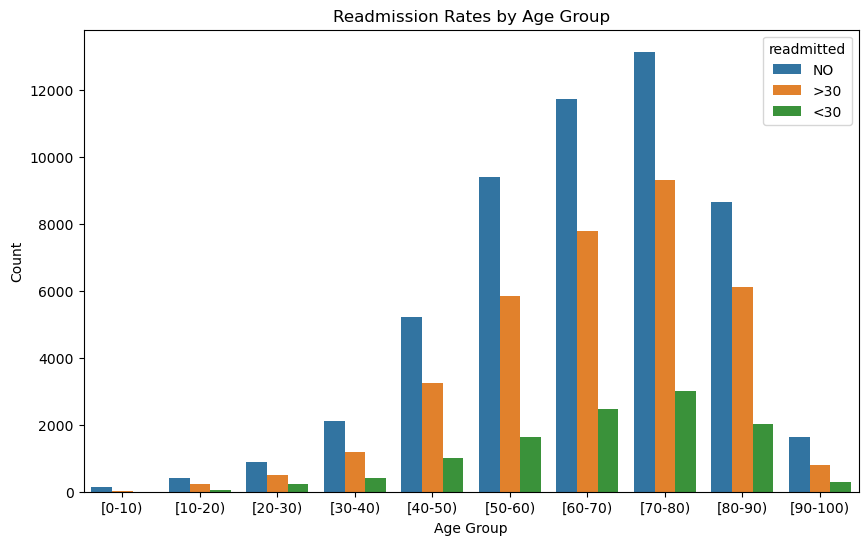

In [134]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='readmitted', data=df)
plt.title('Readmission Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


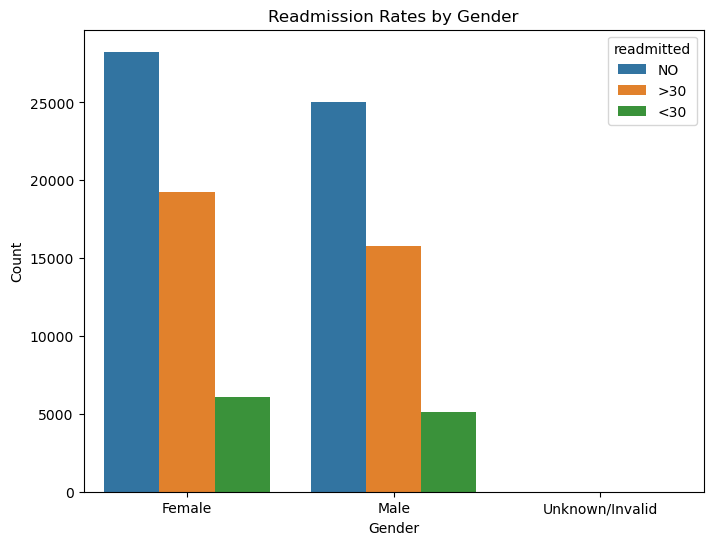

In [135]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='readmitted', data=df)
plt.title('Readmission Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


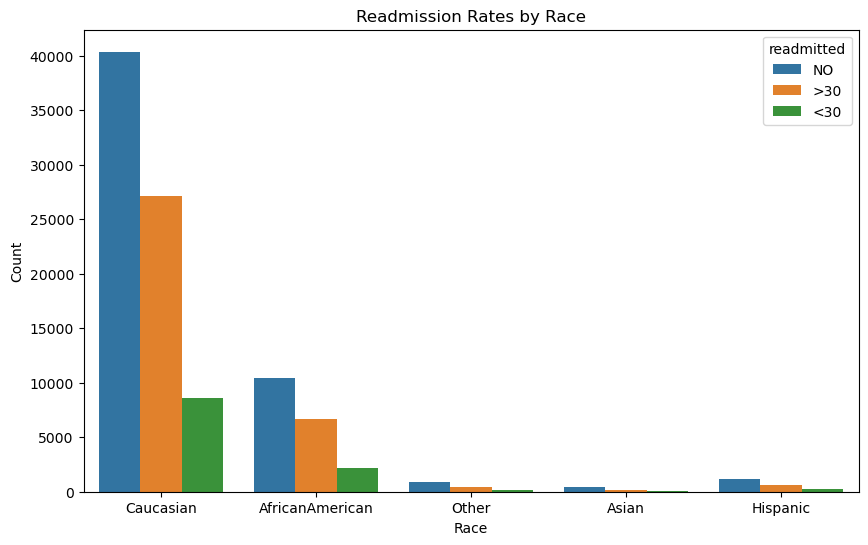

In [136]:
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='readmitted', data=df)
plt.title('Readmission Rates by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()


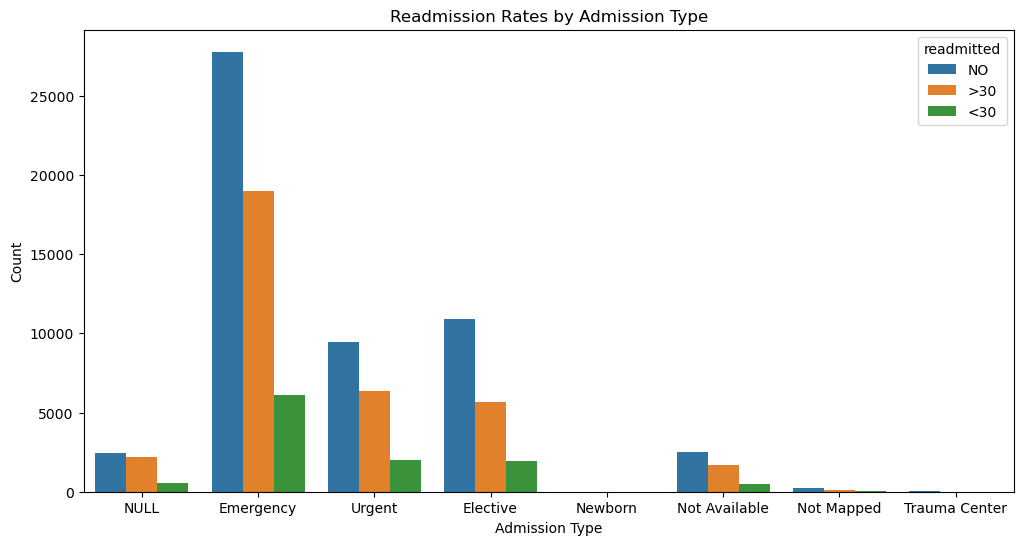

In [137]:
plt.figure(figsize=(12, 6))
sns.countplot(x='admission_type', hue='readmitted', data=df)
plt.title('Readmission Rates by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.show()


C:\Users\sudha\AppData\Local\Temp\ipykernel_17336\1409793447.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='readmitted', y='number_diagnoses', data=df, palette='Set2')


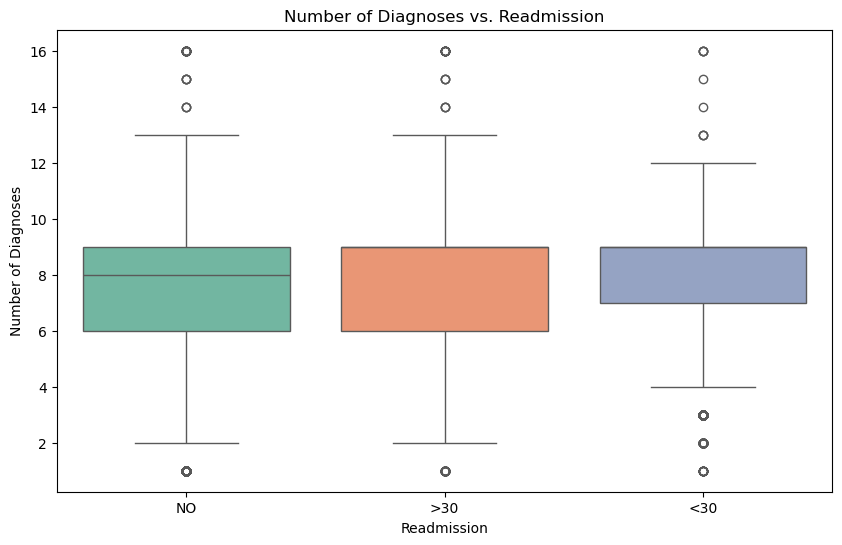

In [138]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='readmitted', y='number_diagnoses', data=df, palette='Set2')
plt.title('Number of Diagnoses vs. Readmission')
plt.xlabel('Readmission')
plt.ylabel('Number of Diagnoses')
plt.show()

# since the data values are skewed, some of the plots do not visibly show the median.

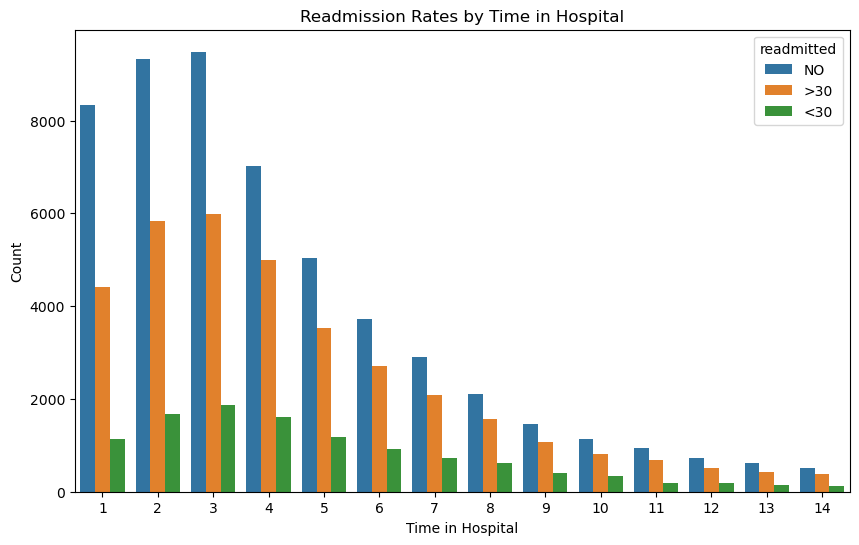

In [139]:
plt.figure(figsize=(10, 6))
sns.countplot(x='time_in_hospital', hue='readmitted', data=df)
plt.title('Readmission Rates by Time in Hospital')
plt.xlabel('Time in Hospital')
plt.ylabel('Count')
plt.show()


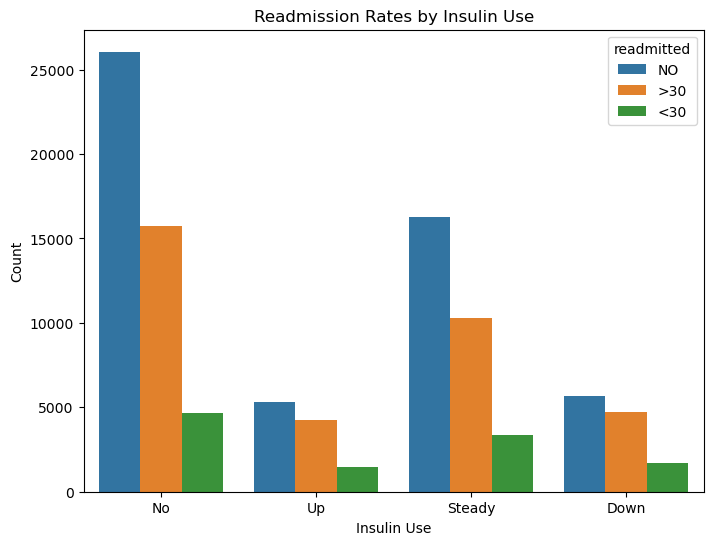

In [140]:
plt.figure(figsize=(8, 6))
sns.countplot(x='insulin', hue='readmitted', data=df)
plt.title('Readmission Rates by Insulin Use')
plt.xlabel('Insulin Use')
plt.ylabel('Count')
plt.show()


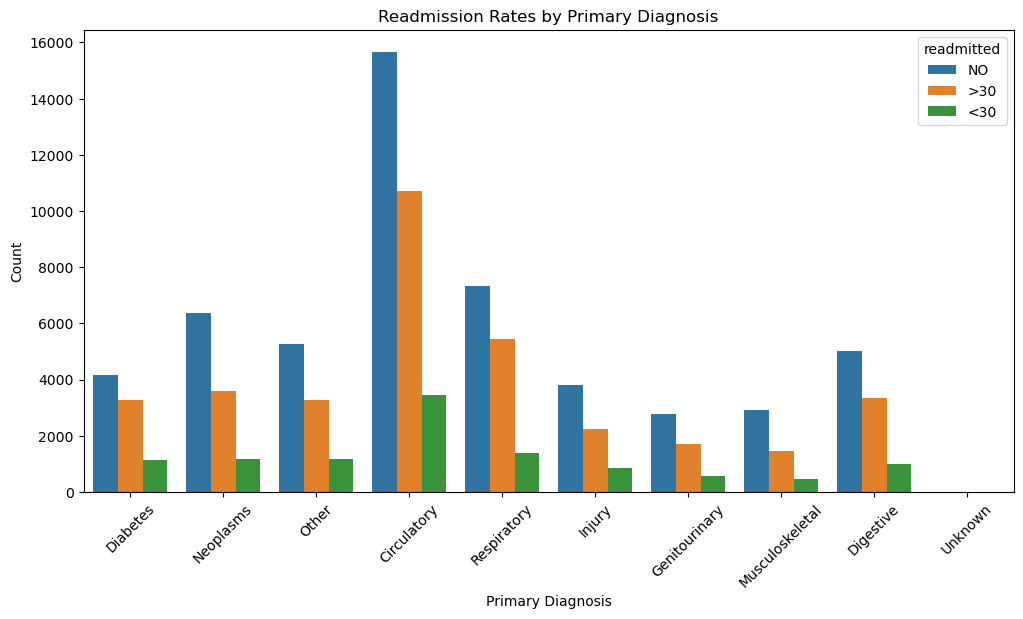

In [141]:
plt.figure(figsize=(12, 6))
sns.countplot(x='primary_diagnosis', hue='readmitted', data=df)
plt.title('Readmission Rates by Primary Diagnosis')
plt.xlabel('Primary Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming your DataFrame is called 'df'

def plot_readmission_overview(df):
    """Create an overview of readmission distribution"""
    plt.figure(figsize=(7, 3))
    
    # Calculate readmission distribution
    readmission_dist = df['readmitted'].value_counts()
    
    # Create bar plot
    sns.barplot(x=readmission_dist.index, y=readmission_dist.values)
    plt.title('Distribution of Readmission Status', fontsize=14)
    plt.xlabel('Readmission Status', fontsize=12)
    plt.ylabel('Number of Patients', fontsize=12)
    
    # Add percentage labels on top of bars
    total = len(df)
    for i, v in enumerate(readmission_dist.values):
        plt.text(i, v, f'{(v/total)*100:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

def plot_age_readmission(df):
    """Analyze readmission patterns across age groups"""
    plt.figure(figsize=(7, 3))
    
    # Create cross-tabulation of age and readmission
    age_readmission = pd.crosstab(df['age'], df['readmitted'], normalize='index') * 100
    
    # Create stacked bar plot
    age_readmission.plot(kind='bar', stacked=True)
    plt.title('Readmission Rates by Age Group', fontsize=14)
    plt.xlabel('Age Group', fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.legend(title='Readmission Status')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

def plot_diagnosis_impact(df):
    """Analyze impact of primary diagnosis on readmission"""
    plt.figure(figsize=(7, 3))
    
    # Calculate readmission rates by diagnosis
    diagnosis_readmission = pd.crosstab(df['primary_diagnosis'], 
                                      df['readmitted'].map({'NO': 'Not Readmitted', 
                                                          '<30': 'Within 30 Days', 
                                                          '>30': 'After 30 Days'}),
                                      normalize='index') * 100
    
    # Create heatmap
    sns.heatmap(diagnosis_readmission, annot=True, fmt='.1f', cmap='YlOrRd')
    plt.title('Readmission Rates by Primary Diagnosis (%)', fontsize=14)
    plt.xlabel('Readmission Status', fontsize=12)
    plt.ylabel('Primary Diagnosis', fontsize=12)
    
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(7, 3))
    
    # Calculate readmission rates by diagnosis
    diagnosis_readmission = pd.crosstab(df['secondary_diagnosis'], 
                                      df['readmitted'].map({'NO': 'Not Readmitted', 
                                                          '<30': 'Within 30 Days', 
                                                          '>30': 'After 30 Days'}),
                                      normalize='index') * 100
    
    # Create heatmap
    sns.heatmap(diagnosis_readmission, annot=True, fmt='.1f', cmap='YlOrRd')
    plt.title('Readmission Rates by Secondary Diagnosis (%)', fontsize=14)
    plt.xlabel('Readmission Status', fontsize=12)
    plt.ylabel('Secondary Diagnosis', fontsize=12)
    
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(7, 3))
    
    # Calculate readmission rates by diagnosis
    diagnosis_readmission = pd.crosstab(df['additional_diagnosis'], 
                                      df['readmitted'].map({'NO': 'Not Readmitted', 
                                                          '<30': 'Within 30 Days', 
                                                          '>30': 'After 30 Days'}),
                                      normalize='index') * 100
    
    # Create heatmap
    sns.heatmap(diagnosis_readmission, annot=True, fmt='.1f', cmap='YlOrRd')
    plt.title('Readmission Rates by Additional Diagnosis (%)', fontsize=14)
    plt.xlabel('Readmission Status', fontsize=12)
    plt.ylabel('Additional Diagnosis', fontsize=12)
    
    plt.tight_layout()
    plt.show()

def plot_time_in_hospital_analysis(df):
    """Analyze relationship between time in hospital and readmission"""
    plt.figure(figsize=(7, 3))
    
    # Create violin plot
    sns.violinplot(x='readmitted', y='time_in_hospital', data=df)
    plt.title('Time in Hospital Distribution by Readmission Status', fontsize=14)
    plt.xlabel('Readmission Status', fontsize=12)
    plt.ylabel('Days in Hospital', fontsize=12)
    
    plt.tight_layout()
    plt.show()

def plot_medication_impact(df):
    """Analyze impact of number of medications on readmission"""
    plt.figure(figsize=(7, 3))
    
    # Create box plot
    sns.boxplot(x='readmitted', y='num_medications', data=df)
    plt.title('Number of Medications vs Readmission Status', fontsize=14)
    plt.xlabel('Readmission Status', fontsize=12)
    plt.ylabel('Number of Medications', fontsize=12)
    
    plt.tight_layout()
    plt.show()

def plot_lab_procedures_analysis(df):
    """Analyze relationship between lab procedures and readmission"""
    plt.figure(figsize=(7, 3))
    
    # Calculate average number of lab procedures for each readmission status
    lab_proc_means = df.groupby('readmitted')['num_lab_procedures'].mean()
    
    # Create bar plot
    sns.barplot(x=lab_proc_means.index, y=lab_proc_means.values)
    plt.title('Average Number of Lab Procedures by Readmission Status', fontsize=14)
    plt.xlabel('Readmission Status', fontsize=12)
    plt.ylabel('Average Number of Lab Procedures', fontsize=12)
    
    # Add value labels on top of bars
    for i, v in enumerate(lab_proc_means.values):
        plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Function to run all visualizations
def analyze_readmissions(df):
    """Run all visualization analyses"""
    plot_readmission_overview(df)
    plot_age_readmission(df)
    plot_diagnosis_impact(df)
    plot_time_in_hospital_analysis(df)
    plot_medication_impact(df)
    plot_lab_procedures_analysis(df)

The plot presents the distribution of readmission status for a group of patients. It shows that the majority of patients (53.6%) were not readmitted, followed by 35.2% who were readmitted after 30 days, and 11.2% who were readmitted within 30 days of their initial discharge. This indicates that while a significant portion of patients avoid readmission, a considerable number still require further hospitalizations, particularly within the first 30 days post-discharge.

The plot presents the readmission rates for patients based on their primary diagnosis. It shows the percentage of patients who were not readmitted, readmitted within 30 days, and readmitted after 30 days, categorized by their primary diagnosis. The plot reveals that patients with circulatory and respiratory issues tend to have higher readmission rates, particularly within 30 days. Conversely, patients with musculoskeletal and neoplasm diagnoses have lower readmission rates. Unknown diagnoses have the highest readmission rate within 30 days.

The plot presents the readmission rates for patients based on their secondary diagnosis. It shows the percentage of patients who were not readmitted, readmitted within 30 days, and readmitted after 30 days, categorized by their secondary diagnosis. The plot reveals that patients with circulatory and respiratory issues tend to have higher readmission rates, particularly within 30 days. Conversely, patients with musculoskeletal and neoplasm diagnoses have lower readmission rates. Unknown diagnoses have the highest readmission rate within 30 days.

The plot presents the readmission rates for patients based on their additional diagnosis. It shows the percentage of patients who were not readmitted, readmitted within 30 days, and readmitted after 30 days, categorized by their additional diagnosis. The plot reveals that patients with circulatory and respiratory issues tend to have higher readmission rates, particularly within 30 days. Conversely, patients with musculoskeletal and neoplasm diagnoses have lower readmission rates. Unknown diagnoses have the highest readmission rate within 30 days.

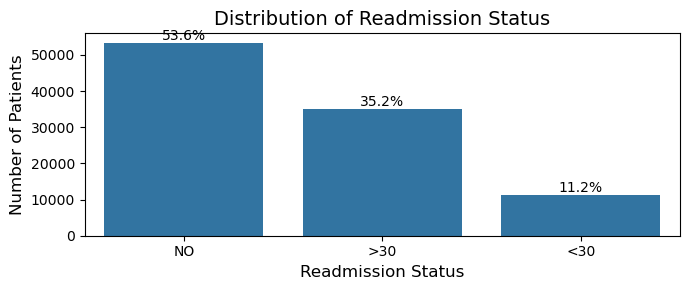

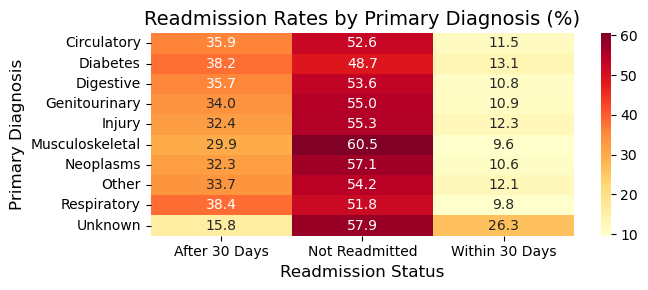

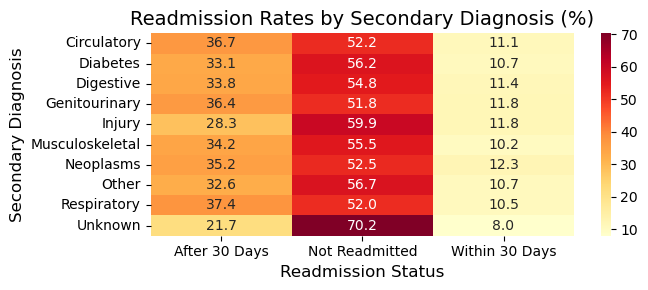

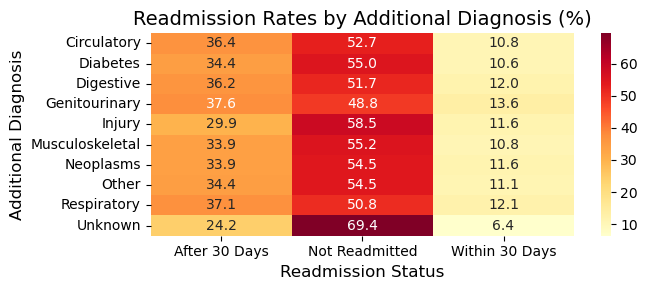

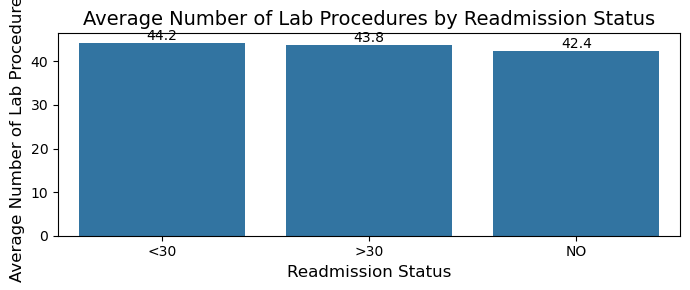

In [143]:
plot_readmission_overview(df)
plot_diagnosis_impact(df)

plot_lab_procedures_analysis(df)

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

def plot_diabetes_medication_impact(df):
    """Analyze the impact of diabetes medications on readmission"""
    
    # List of diabetes medications
    medications = ['metformin', 'insulin', 'glipizide', 'glyburide', 'pioglitazone', 
                   'rosiglitazone', 'glimepiride']
    
    # Initialize subplots
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.ravel()
    
    # Calculate readmission rates for each medication and plot
    for idx, med in enumerate(medications):
        # Filter out the medication status for each value
        med_status = df[med].map({'No': 'Not prescribed', 'Steady': 'Steady', 'Up': 'Increased', 'Down': 'Decreased'})
        
        # Calculate the readmission rates, convert to DataFrame, and plot
        rates = pd.crosstab(med_status, df['readmitted'], normalize='index') * 100
        rates = rates.apply(pd.to_numeric, errors='coerce')  # Ensure numeric type
        
        # Plot each medication impact
        rates.plot(kind='bar', ax=axes[idx])
        axes[idx].set_title(f'{med.capitalize()} Impact')
        axes[idx].set_xlabel('Medication Status')
        axes[idx].set_ylabel('Readmission Rate (%)')
        axes[idx].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

def plot_individual_diagnosis_readmission(df):
    """Create separate plots for each diagnosis type in relation to readmission"""
    
    # Plot for primary diagnosis
    plt.figure(figsize=(8, 6))
    sns.countplot(x='primary_diagnosis', hue='readmitted', data=df)
    plt.title('Primary Diagnosis vs. Readmission Status', fontsize=14)
    plt.xlabel('Primary Diagnosis', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Plot for secondary diagnosis
    plt.figure(figsize=(8, 6))
    sns.countplot(x='secondary_diagnosis', hue='readmitted', data=df)
    plt.title('Secondary Diagnosis vs. Readmission Status', fontsize=14)
    plt.xlabel('Secondary Diagnosis', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Plot for additional diagnosis
    plt.figure(figsize=(8, 6))
    sns.countplot(x='additional_diagnosis', hue='readmitted', data=df)
    plt.title('Additional Diagnosis vs. Readmission Status', fontsize=14)
    plt.xlabel('Additional Diagnosis', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def analyze_advanced_readmissions(df):
     """Run all advanced visualization analyses"""
     plot_diabetes_medication_impact(df)
     plot_individual_diagnosis_readmission(df)

**Plot: Diabetes Medication Impact on Readmission**
The bars represent the percentage of patients who were readmitted, grouped by medication status. Higher bars indicate higher readmission rates, suggesting the impact of that medication status on readmission. The plot illustrates the readmission rates of patients based on their medication status for various diabetes medications. Notably, Metformin and Pioglitazone saw increased readmission rates when doses were decreased or the drug was discontinued, respectively. Conversely, Insulin demonstrated the lowest readmission rate when doses were decreased. For Glipizide, Glyburide, Rosiglitazone, and Glimepiride, the highest readmission rates were observed in patients who were not prescribed these medications.

The three plots— **Primary Diagnosis, Secondary Diagnosis, and Additional Diagnosis vs. Readmission** — show the distribution of readmission rates across different diagnosis types. They highlight how primary, secondary, and additional diagnoses influence the likelihood of readmission, offering insights for targeted interventions based on diagnosis type.
The plot presents the readmission rates of patients based on their primary, secondary, and additional diagnoses. The x-axis categorizes the diagnoses into groups like diabetes, neoplasms, circulatory, etc., while the y-axis represents the count of patients. The bars are color-coded to indicate the readmission status: blue for not readmitted, orange for readmitted within 30 days, and green for readmitted after 30 days. The plots show that diabetes is a common primary diagnosis, and circulatory diseases are frequent secondary and additional diagnoses. The readmission rates vary across different diagnoses, with some categories showing higher rates of readmission compared to others.

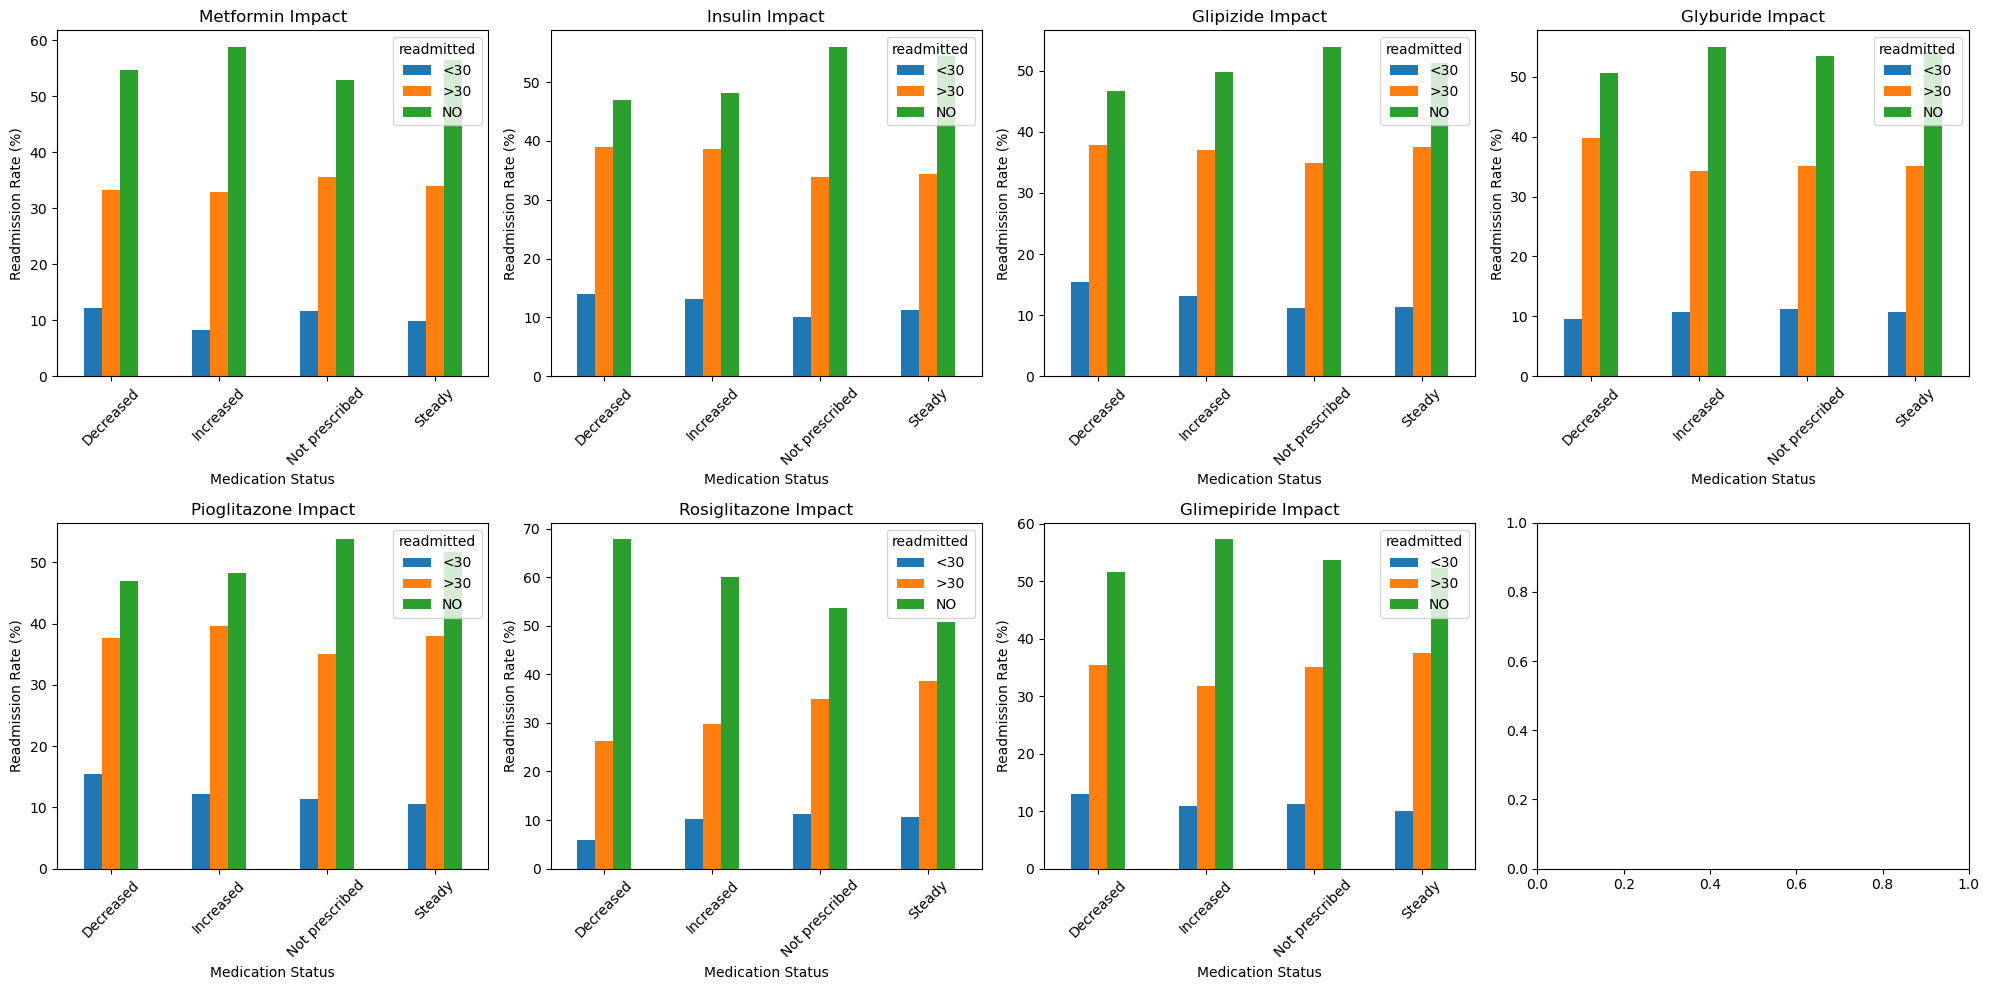

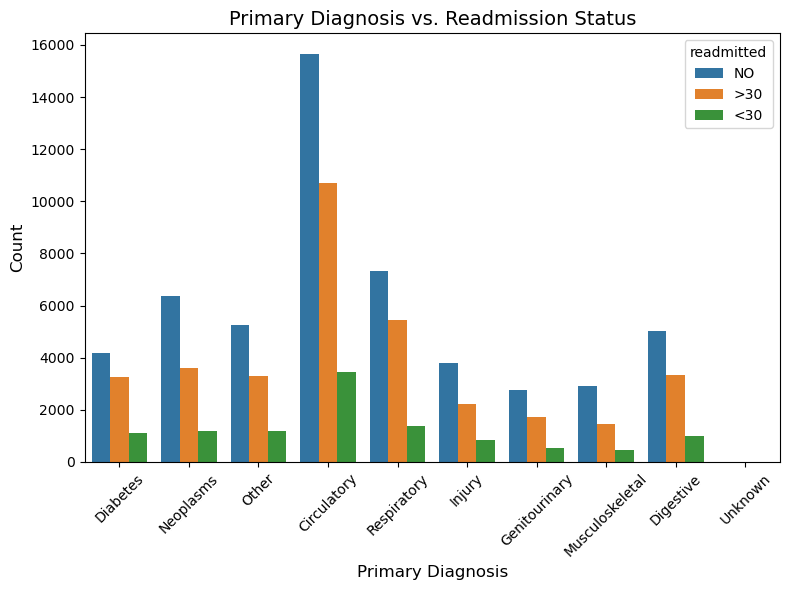

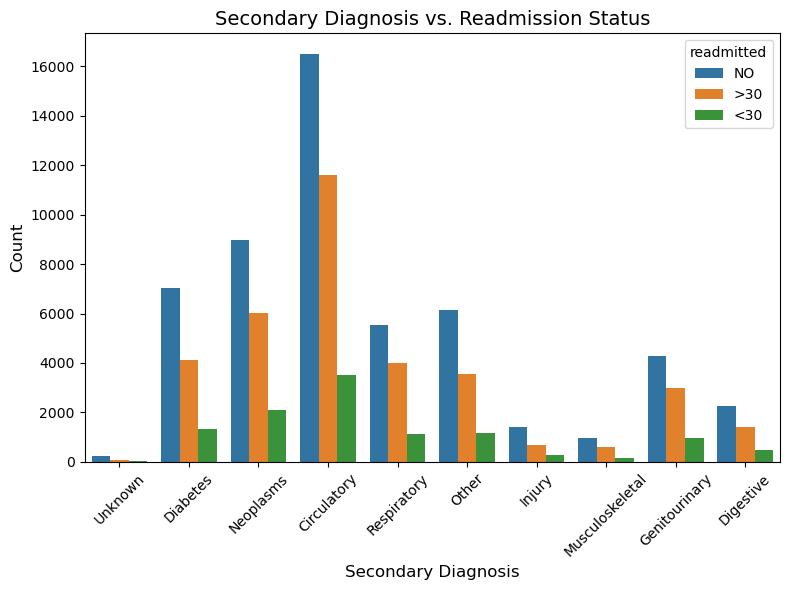

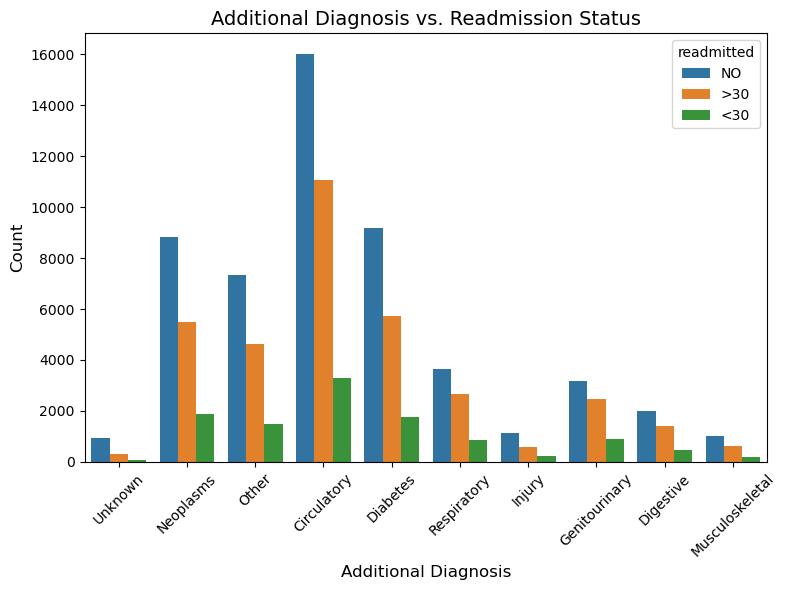

In [145]:
analyze_advanced_readmissions(df)

In [146]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'primary_diagnosis', 'secondary_diagnosis',
       'additional_diagnosis', 'admission_type'],
      dtype='object')

**Features like patient_nbr, number_emergency, number_inpatient, and num_diagnoses have very high F-statistics and very low p-values (p-values close to 0). These features are highly significant and likely to be important predictors.**

**Features like age have a high Chi-squared statistic and low p-value, which means it is a significant categorical feature for predicting readmitted.**

In [147]:
import pandas as pd
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

# Assuming you have already loaded your DataFrame `df`
# df = pd.read_csv('your_file.csv')  # Replace with your actual data loading step

# Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Ensure 'readmitted' column is binary or numeric
# Convert 'readmitted' to a binary numeric format if it is not
if df['readmitted'].dtype == 'object':
    label_encoder = LabelEncoder()
    df['readmitted'] = label_encoder.fit_transform(df['readmitted'])

# Convert categorical columns to numeric using Label Encoding
for col in categorical_columns:
    if col != 'readmitted':  # Don't encode 'readmitted' again if already done
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# F-statistic (ANOVA) for numerical columns
f_stat_results = {}
for col in numerical_columns:
    # Perform ANOVA test for each numerical column against the target 'readmitted'
    f_stat, p_value = f_classif(df[[col]], df['readmitted'])
    f_stat_results[col] = (f_stat[0], p_value[0])

# Print the results
print("F-statistic and p-values for numerical columns:")
for col, (f_stat, p_value) in f_stat_results.items():
    print(f"Column: {col}, F-statistic: {f_stat}, p-value: {p_value}")

# Optionally, you can also perform the Chi-squared test for categorical columns:
from sklearn.feature_selection import chi2

chi2_results = {}
for col in categorical_columns:
    # Only apply chi-squared to categorical columns that are not the target variable
    if col != 'readmitted':
        chi2_stat, p_value = chi2(df[[col]], df['readmitted'])
        chi2_results[col] = (chi2_stat[0], p_value[0])

# Print Chi-squared results
print("\nChi-squared results for categorical columns:")
for col, (chi2_stat, p_value) in chi2_results.items():
    print(f"Column: {col}, Chi-squared statistic: {chi2_stat}, p-value: {p_value}")

F-statistic and p-values for numerical columns:
Column: encounter_id, F-statistic: 82.20737202056706, p-value: 2.124514978825282e-36
Column: patient_nbr, F-statistic: 287.8342249403932, p-value: 2.2669734749789516e-125
Column: time_in_hospital, F-statistic: 166.03437397436082, p-value: 1.0286270799562702e-72
Column: num_lab_procedures, F-statistic: 76.64180949115139, p-value: 5.501737082936938e-34
Column: num_procedures, F-statistic: 97.48524197152133, p-value: 5.0597308793263304e-43
Column: num_medications, F-statistic: 135.29077386827564, p-value: 2.1072587507141592e-59
Column: number_outpatient, F-statistic: 334.50148581186096, p-value: 1.637195050791915e-145
Column: number_emergency, F-statistic: 556.0973945055234, p-value: 6.759411472293671e-241
Column: number_inpatient, F-statistic: 2891.942890023546, p-value: 0.0
Column: number_diagnoses, F-statistic: 608.3438408463115, p-value: 2.523837248892371e-263

Chi-squared results for categorical columns:
Column: race, Chi-squared statis